In [39]:
# !python -m spacy download en_core_web_lg

In [3]:
import re
import joblib
import nltk
import spacy
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_lg')

ps = PorterStemmer()
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 1. Loading the Dataset

In [4]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

true['fake'] = 0
fake['fake'] = 1

df = pd.DataFrame()
df = pd.concat([fake,true])

del true
del fake

df = df.drop(columns = ['date','subject','text'])
df = df.sample(frac = 1)

df.head()

,title,fake
19417,U.S. not ruling out possible oil embargo on Ve...,0
5964,Trump spoke to Mexican president on Friday: Wh...,0
2293,GOP Rep Asks Muslim High School Students: ‘Do...,1
5183,The Mindboggling Sexist And Racist Reasons Cl...,1
14103,Missing Argentine submarine highlights years o...,0


In [5]:
df.shape

(44898, 2)

### 2. Data Preprocessing

In [6]:
corpus = []
title = np.array(df['title'])
nltk.download('punkt_tab')
for i in tqdm(range(len(title))):
  news = re.sub(r'^a-zA-Z', '', title[i])
  news = word_tokenize(news.lower())
  news = ' '.join([ps.stem(word) for word in news if not word in stopwords.words('english')])
  news = nlp(news).vector
  corpus.append(news)

X = np.array(corpus)

X_train = X[:35000]
y_train = df['fake'][:35000]
X_test  = X[35000:]
y_test  = df['fake'][35000:]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
100%|██████████| 44898/44898 [09:22<00:00, 79.88it/s]


### 3. Training the Classifier

In [7]:
classifier = LogisticRegression(random_state = 1, max_iter = 60)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=60, random_state=1)

### 4. Model Evaluation

[[4351  321]
 [ 336 4890]]
Accuracy :  93.36


<Axes: >

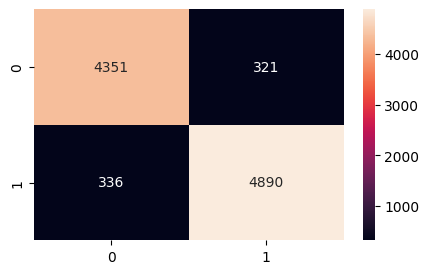

In [8]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy : ' , round(accuracy_score(y_test,y_pred)*100,2))

plt.figure(figsize = (5,3))
sns.heatmap(cm, annot = True, fmt = 'd')

In [12]:
import joblib
with open('logReg.joblib', 'wb') as f:
    joblib.dump(classifier, f)

# Trying to do PCA to visualize the Data

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

### 2-D PCA

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
model = LogisticRegression(random_state = 69, max_iter = 60)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_train_pca)

LogisticRegression(max_iter=60, random_state=69)

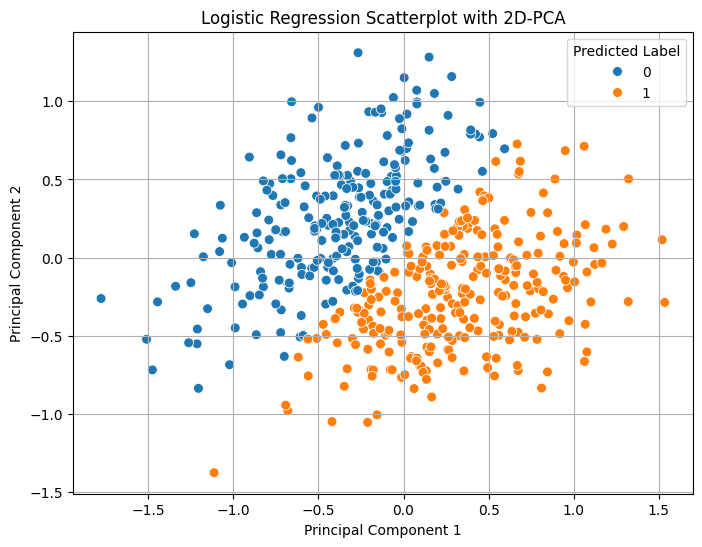

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_train_pca[:500, 0],
    y=X_train_pca[:500, 1],
    hue=y_pred[:500],
    s=50
)

plt.title("Logistic Regression Scatterplot with 2D-PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Predicted Label")
plt.show()

### 3-D PCA

In [ ]:
#3-D
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
model = LogisticRegression(random_state = 69, max_iter = 60)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_train_pca)

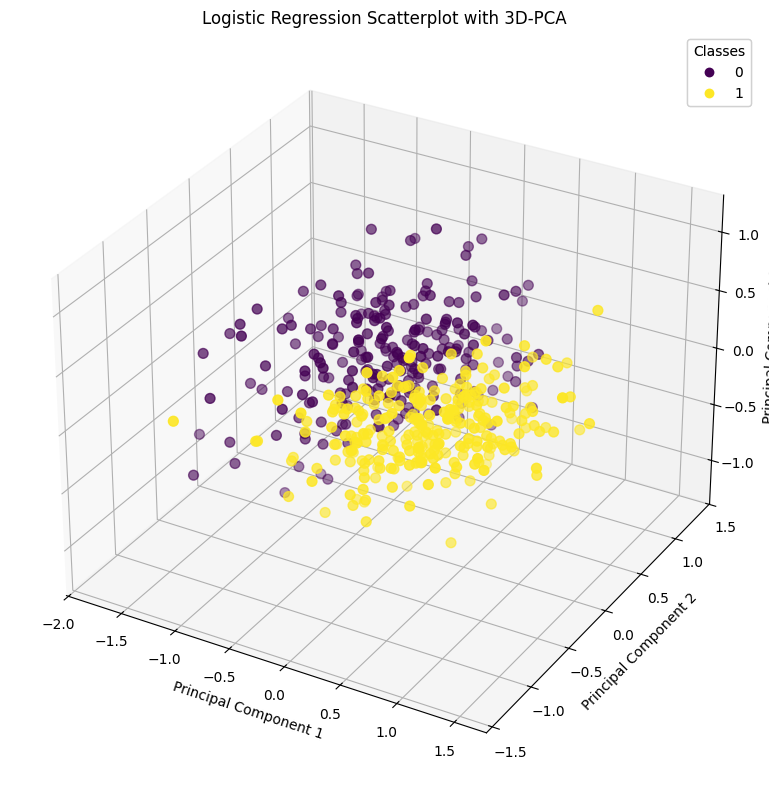

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca[:500, 0],
    X_train_pca[:500, 1],
    X_train_pca[:500, 2],
    c=y_pred[:500],
    s=50
)

ax.set_title('Logistic Regression Scatterplot with 3D-PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()